# Rename me


https://weather.uwyo.edu/upperair/sounding.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [24]:
#========================================
# number of data columns
num_cols = 11

# path to sounding file
sound_txt = "./sound_oct.txt"
# sound_txt = "./sound_sep.txt"
# sound_txt = "./sound_aug.txt"
# sound_txt = "./sound_jul.txt"
# sound_txt = "./sound_jun.txt"

# row where data starts (0 is first)
row_ds = 5
#========================================

read_in_data = np.array([])

# open text file
with open(sound_txt) as file:
    
    # run through all file rows
    for ii, item in enumerate(file):
#         print(item)
        
        # save data if after header rows
        if ii >= row_ds:
            
            # split data by spaces and save as floats
            
            data_columns = [float(x) for x in item.split('\n')[0].split(' ') if x != '']
            
            # save data if has length num_columns
            # (don't save on pressure levels where not all variables are present)
            if len(data_columns) == num_cols:
                read_in_data = np.append(read_in_data, data_columns)
            
# reshape into array
sounding_data = np.reshape(read_in_data, (int(len(read_in_data)/num_cols), num_cols))        

In [25]:
# jun_RH, jun_P = sounding_data[:,4], sounding_data[:,0]
# jul_RH, jul_P = sounding_data[:,4], sounding_data[:,0]
# aug_RH, aug_P = sounding_data[:,4], sounding_data[:,0]
# sep_RH, sep_P = sounding_data[:,4], sounding_data[:,0]
# oct_RH, oct_P = sounding_data[:,4], sounding_data[:,0]

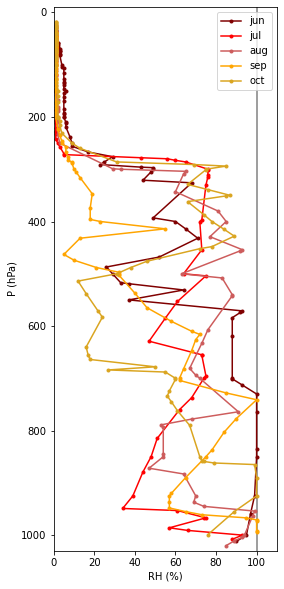

In [26]:
fig, ax = plt.subplots(figsize=(4,10))
ax.invert_yaxis()


ax.plot(jun_RH, jun_P, marker='.', c='maroon', label = 'jun')
ax.plot(jul_RH, jul_P, marker='.', c='red', label = 'jul')
ax.plot(aug_RH, aug_P, marker='.', c='indianred', label = 'aug')
ax.plot(sep_RH, sep_P, marker='.', c='orange', label = 'sep')
ax.plot(oct_RH, oct_P, marker='.', c='goldenrod', label = 'oct')

ax.set_xlim(0,110)
ax.set_ylim(1030,-10)

RH_thresh = 100
ax.vlines(RH_thresh,-20,1050, colors='k', alpha=0.5, zorder=-1)

ax.set_xlabel('RH (%)')
ax.set_ylabel('P (hPa)')

plt.legend()

# ax.plot(ds2.r, ds2.level, marker='.', c='k')


In [ ]:
sep_P

In [7]:
ds = xr.open_dataset('./ERA5_sounding.nc').sel(longitude = -155, latitude = 72.0)
ds.close()

ds2 = ds.sel(time = ds.time[0])

ds2

<xarray.Dataset>
Dimensions:    (level: 37)
Coordinates:
    longitude  float32 -155.0
    latitude   float32 72.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time       datetime64[ns] 2013-03-01
Data variables:
    r          (level) float32 ...
    t          (level) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-22 23:43:44 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

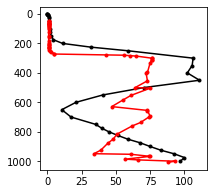

In [8]:

fig, ax = plt.subplots(figsize=(3,3))

ax.plot(ds2.r, ds2.level, marker='.', c='k')

ax.invert_yaxis()



ax.plot(sounding_data[:,4], sounding_data[:,0], marker='.', c='r')

# ax2 = ax.twiny()
# ax2.plot(ds2.t-273.15, ds2.level, c='r')

# ax.set_xlim(0,100)
# ax2.set_xlim(-40,40)